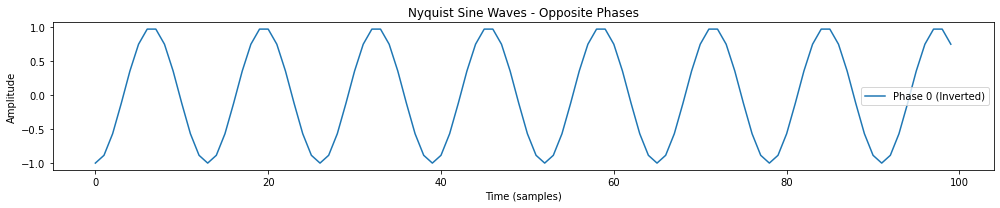

In [245]:
import numpy as np
import matplotlib.pyplot as plt

def plot_nyquist_sine_waves(sampling_rate, duration):
    nyquist_frequency = sampling_rate / 13
    t = np.arange(duration)  # integer time vector

    sine_wave_90 = np.sin(2 * np.pi * nyquist_frequency * t / sampling_rate + np.pi / 2)  # Sine wave with phase π/2
    #nyquist_frequency = sampling_rate / 25
    sine_wave_0 = np.sin(2 * np.pi * nyquist_frequency * t / sampling_rate - np.pi / 2)

    plt.figure(figsize=(14, 3))

    plt.plot(t, sine_wave_0, label="Phase 0 (Inverted)")
    #plt.plot(t, sine_wave_90 , label="Phase π/2 (90°)", color='orange')
    plt.title("Nyquist Sine Waves - Opposite Phases")
    plt.xlabel("Time (samples)")
    plt.ylabel("Amplitude")
    plt.legend()

    plt.tight_layout()
    plt.show()
    
    return sine_wave_0 #+ sine_wave_90

# Example usage
sampling_rate = 44100  # 1000 Hz
duration = 100  # 100 samples
data = plot_nyquist_sine_waves(sampling_rate, duration)


In [3]:
data

array([-1.00000000e+00,  0.00000000e+00,  1.00000000e+00,  1.22464680e-16,
       -1.00000000e+00, -2.44929360e-16,  1.00000000e+00,  3.67394040e-16,
       -1.00000000e+00, -4.89858720e-16,  1.00000000e+00,  2.38868024e-15,
       -1.00000000e+00, -7.34788079e-16,  1.00000000e+00,  4.40996644e-15,
       -1.00000000e+00, -9.79717439e-16,  1.00000000e+00, -2.45053156e-15,
       -1.00000000e+00, -8.33007416e-15,  1.00000000e+00, -2.20560220e-15,
       -1.00000000e+00, -8.57500352e-15,  1.00000000e+00,  5.14475452e-15,
       -1.00000000e+00, -8.81993288e-15,  1.00000000e+00,  5.38968388e-15,
       -1.00000000e+00, -9.06486224e-15,  1.00000000e+00,  5.63461324e-15,
       -1.00000000e+00, -9.30979160e-15,  1.00000000e+00,  5.87954260e-15,
       -1.00000000e+00, -9.55472096e-15,  1.00000000e+00, -9.80955401e-16,
       -1.00000000e+00,  4.41120440e-15,  1.00000000e+00, -7.84145340e-15,
       -1.00000000e+00, -2.93915232e-15,  1.00000000e+00, -4.91096681e-16,
       -1.00000000e+00,  

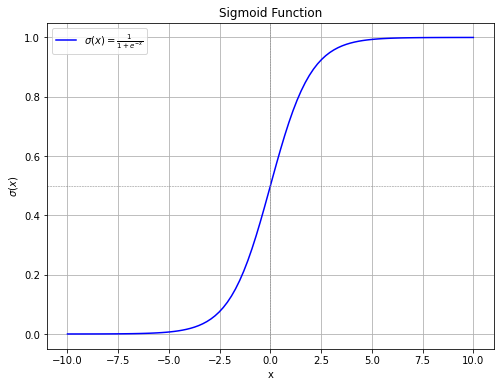

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate an array of x values
x = np.linspace(-10, 10, 100)

# Apply the sigmoid function to each x value
y = sigmoid(x)

# Plot the sigmoid function
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r'$\sigma(x) = \frac{1}{1 + e^{-x}}$', color='b')
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel(r'$\sigma(x)$')
plt.axhline(0.5, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.legend(loc='best')
plt.grid(True)
plt.show()


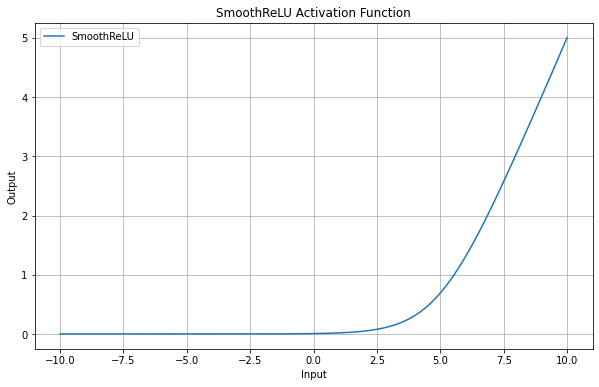

In [5]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class SmoothReLU(nn.Module):
    def __init__(self):
        super(SmoothReLU, self).__init__()
        
    def forward(self, x):
        return  torch.log1p(torch.exp(x-5))  # Smooth approximation of ReLU

def plot_activation_function(activation_fn, x_range):
    x = torch.linspace(x_range[0], x_range[1], 1000)
    y = activation_fn(x)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x.numpy(), y.detach().numpy(), label="SmoothReLU")
    plt.title("SmoothReLU Activation Function")
    plt.xlabel("Input")
    plt.ylabel("Output")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
smooth_relu = SmoothReLU()

# Plot the SmoothReLU function
plot_activation_function(smooth_relu, [-10, 10])


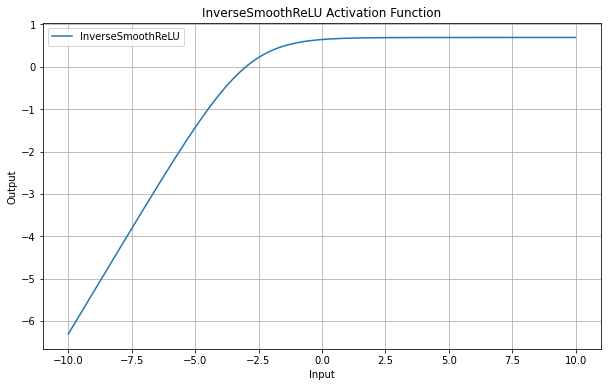

In [6]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class InverseSmoothReLU(nn.Module):
    def __init__(self):
        super(InverseSmoothReLU, self).__init__()
        
    def forward(self, x):
        return -torch.log1p(torch.exp(-x-3)) + np.log(2)  # Smooth approximation for the third quadrant

def plot_activation_function(activation_fn, x_range):
    x = torch.linspace(x_range[0], x_range[1], 1000)
    y = activation_fn(x)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x.numpy(), y.detach().numpy(), label=activation_fn.__class__.__name__)
    plt.title(f"{activation_fn.__class__.__name__} Activation Function")
    plt.xlabel("Input")
    plt.ylabel("Output")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
inverse_smooth_relu = InverseSmoothReLU()

# Plot the InverseSmoothReLU function
plot_activation_function(inverse_smooth_relu, [-10, 10])


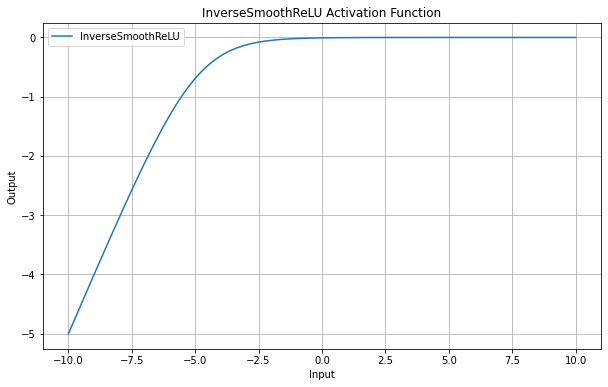

In [7]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class InverseSmoothReLU(nn.Module):
    def __init__(self):
        super(InverseSmoothReLU, self).__init__()
        
    def forward(self, x):
        return -torch.log1p(torch.exp(-x-5))

def plot_activation_function(activation_fn, x_range):
    x = torch.linspace(x_range[0], x_range[1], 1000)
    y = activation_fn(x)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x.numpy(), y.detach().numpy(), label=activation_fn.__class__.__name__)
    plt.title(f"{activation_fn.__class__.__name__} Activation Function")
    plt.xlabel("Input")
    plt.ylabel("Output")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
inverse_smooth_relu = InverseSmoothReLU()

# Plot the InverseSmoothReLU function
plot_activation_function(inverse_smooth_relu, [-10, 10])


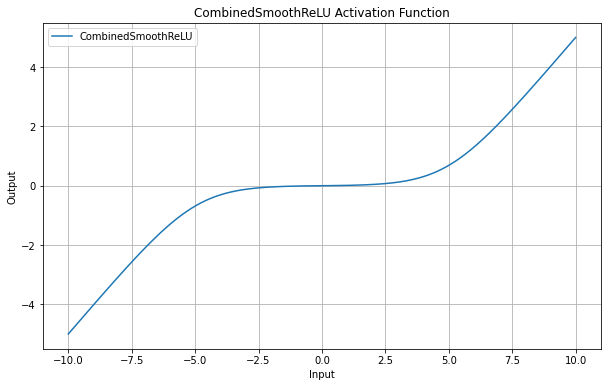

In [8]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class CombinedSmoothReLU(nn.Module):
    def __init__(self):
        super(CombinedSmoothReLU, self).__init__()
        
    def forward(self, x):
        smooth_relu = torch.log1p(torch.exp(x-5)) - 0.0067
        inverse_smooth_relu = -torch.log1p(torch.exp(-x-5)) + 0.0067 
        return torch.where(x >= 0, smooth_relu, inverse_smooth_relu)

def plot_activation_function(activation_fn, x_range):
    x = torch.linspace(x_range[0], x_range[1], 1000)
    y = activation_fn(x)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x.numpy(), y.detach().numpy(), label=activation_fn.__class__.__name__)
    plt.title(f"{activation_fn.__class__.__name__} Activation Function")
    plt.xlabel("Input")
    plt.ylabel("Output")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
combined_smooth_relu = CombinedSmoothReLU()

# Plot the CombinedSmoothReLU function
plot_activation_function(combined_smooth_relu, [-10, 10])



In [9]:
class ParameterizedSigmoid(nn.Module):
    def __init__(self):
        super(ParameterizedSigmoid, self).__init__()
        # Initialize the shift parameter c
        self.c = nn.Parameter(torch.tensor(0.0))  # You can start with any initial value, e.g., 0.0

    def forward(self, x):
        # Compute the shifted sigmoid activation
        return 1 / (1 + torch.exp(-(x + self.c)))
    
class VectorizedParameterizedSigmoid(nn.Module):
    def __init__(self, input_dim):
        super(VectorizedParameterizedSigmoid, self).__init__()
        # Initialize the shift parameter c as a vector of size [input_dim, 1]
        self.c = nn.Parameter(torch.zeros(input_dim, 1))  # Initialize c with zeros or any other value

    def forward(self, x):
        # Ensure x and c are broadcasted correctly
        print(x.shape, self.c.shape)
        return 1 / (1 + torch.exp(-(x + self.c.t())))



In [10]:
# Example usage
input_dim = 10  # Assume an input dimension of 10 for this example
model = VectorizedParameterizedSigmoid(input_dim)

# Create a batch of input vectors
x = torch.randn(5, input_dim)  # Example input with batch size 5 and 10 features each
output = model(x)
print(output.shape)

torch.Size([5, 10]) torch.Size([10, 1])
torch.Size([5, 10])


In [11]:
inverse_smooth_relu(torch.tensor(0))

tensor(-0.0067)

In [12]:
smooth_relu(torch.tensor(0))

tensor(0.0067)

In [13]:
class DoubleDutchLayer(nn.Module):
    def __init__(self, sampling_rate, denominator):
        super(DoubleDutchLayer, self).__init__()
        self.sampling_rate = sampling_rate
        self.denominator = denominator
        self.frequency = sampling_rate / denominator
        self.activation = CombinedSmoothReLU()
        self.a1 = nn.Parameter(torch.tensor(1.0)) #randomize these.  
        self.a2 = nn.Parameter(torch.tensor(1.0))
        
    def reset_parameters(self):
        nn.init.uniform_(self.a1, -1.0, 1.0)
        nn.init.uniform_(self.a2, -1.0, 1.0)
    
    def forward(self, amplitude, t ):
        batch_size = t.shape[0]
        
        # Ensure sine waves are on the same device as amplitudes
        sine_wave_0 = torch.sin(2 * np.pi * self.frequency * t / sampling_rate - np.pi / 2) #.to(amplitude.device).unsqueeze(0).expand(batch_size, -1)
        sine_wave_90 = torch.sin(2 * np.pi * self.frequency * t / sampling_rate + np.pi / 2) #.to(amplitude.device).unsqueeze(0).expand(batch_size, -1)
        #print(sine_wave_0.shape)
        # Multiply sine waves by amplitudes
        wave_0 = amplitude * self.a1 * sine_wave_0
        wave_90 = amplitude * self.a2 * sine_wave_90

        # Apply the CombinedSmoothReLU activation function
        output_0 = self.activation(wave_0)
        output_90 = self.activation(wave_90)

        return output_0, output_90
#do the expanding here.  in the forward.  make it sort of batchy? t is a batch, but if it gets a tensor of 10 input_activations, double it
#yup, do it here.  
class DoubleDutchLayer2(nn.Module):
    def __init__(self, sampling_rate, denominator):
        super(DoubleDutchLayer2, self).__init__()
        self.sampling_rate = sampling_rate
        self.denominator = denominator
        self.frequency = sampling_rate / denominator
        self.activation1 = ParameterizedSigmoid()
        self.activation2 = ParameterizedSigmoid()
        self.a1 = nn.Parameter(torch.tensor(1.0)) #randomize these.  
        self.a2 = nn.Parameter(torch.tensor(1.0)) 
        
    def reset_parameters(self):
        nn.init.uniform_(self.activation1.c, -1.0, 1.0)
        nn.init.uniform_(self.activation2.c, -1.0, 1.0)
        nn.init.uniform_(self.a1, -1.0, 1.0)
        nn.init.uniform_(self.a2, -1.0, 1.0)
    
    def forward(self, t,input_activation ):
        #input_amplitude here? not a bad idea.
        #t is linear integers, input_activation is the input from the previous denominator layer. 
        batch_size = t.shape[0]
        
        #orthogonal? is that right?
        sine_wave_1 = torch.sin(2 * np.pi * self.frequency * t / sampling_rate - np.pi / 2) #.to(amplitude.device).unsqueeze(0).expand(batch_size, -1)
        sine_wave_2 = torch.sin(2 * np.pi * self.frequency * t / sampling_rate + np.pi / 2) #.to(amplitude.device).unsqueeze(0).expand(batch_size, -1)
        
        act_1 = input_activation * self.activation1(sine_wave_1)
        act_2 = input_activation * self.activation2(sine_wave_2)

        amplitude = self.a1 * act_1 + self.a2 * act_2
        
        return act_1, act_2, amplitude
    
class DoubleDutchLayer3(nn.Module):
    def __init__(self, sampling_rate, denominator):
        """
        This shares weights, and i don't think it is capable of being expressive enough.  
        
        """
        super(DoubleDutchLayer3, self).__init__()
        self.sampling_rate = sampling_rate
        self.denominator = denominator
        self.frequency = sampling_rate / denominator
        self.activation1 = ParameterizedSigmoid()
        self.activation2 = ParameterizedSigmoid()
        self.a1 = nn.Parameter(torch.tensor(1.0)) #randomize these.  
        self.a2 = nn.Parameter(torch.tensor(1.0)) 
        
    def reset_parameters(self):
        nn.init.uniform_(self.activation1.c, -1.0, 1.0)
        nn.init.uniform_(self.activation2.c, -1.0, 1.0)
        nn.init.uniform_(self.a1, -1.0, 1.0)
        nn.init.uniform_(self.a2, -1.0, 1.0)
    
    def forward(self, t,input_activation ):
        #input_amplitude here? not a bad idea.
        #t is linear integers, input_activation is the input from the previous denominator layer. 
        #print(t.shape, input_activation.shape)
        #batch_size = t.shape[0]
        #print(t.shape)
        #orthogonal? is that right?
        sine_wave_1 = torch.sin(2 * np.pi * self.frequency * t / sampling_rate - np.pi / 2) #.to(amplitude.device).unsqueeze(0).expand(batch_size, -1)
        sine_wave_2 = torch.sin(2 * np.pi * self.frequency * t / sampling_rate + np.pi / 2) #.to(amplitude.device).unsqueeze(0).expand(batch_size, -1)
        
        #input_activation = input_activation.unsqueeze(1)
        
        
        #print(input_activation.shape,self.activation1(sine_wave_1).shape)
        act_1 = input_activation * self.activation1(sine_wave_1)
        act_2 = input_activation * self.activation2(sine_wave_2)
        
        act_comb = torch.cat((act_1, act_2), dim=1)
        amplitude = self.a1 * act_1 + self.a2 * act_2
        
        return act_comb, amplitude.sum(dim=1, keepdim=True)

    
class DoubleDutchLayer4(nn.Module):
    def __init__(self, sampling_rate, denominator, param_dim):
        """
        This doesn't share. 
        
        """
        super(DoubleDutchLayer4, self).__init__()
        self.sampling_rate = sampling_rate
        self.denominator = denominator
        self.frequency = sampling_rate / denominator
        self.c1 = nn.Parameter(torch.zeros(param_dim))
        self.c2 = nn.Parameter(torch.zeros(param_dim))
        self.a1 = nn.Parameter(torch.randn(param_dim)) 
        self.a2 = nn.Parameter(torch.randn(param_dim))
        
    def reset_parameters(self):
        nn.init.uniform_(self.activation1.c, -1.0, 1.0)
        nn.init.uniform_(self.activation2.c, -1.0, 1.0)
        nn.init.uniform_(self.a1, -1.0, 1.0)
        nn.init.uniform_(self.a2, -1.0, 1.0)
    
    def forward(self, t,input_activation ):
        #input_amplitude here? not a bad idea.
        #t is linear integers, input_activation is the input from the previous denominator layer. 
        #print(t.shape, input_activation.shape)
        #batch_size = t.shape[0]
        #print(t.shape)
        #orthogonal? is that right?
        sine_wave_1 = 20 * torch.sin(2 * np.pi * self.frequency * t / sampling_rate - np.pi / 2) #.to(amplitude.device).unsqueeze(0).expand(batch_size, -1)
        sine_wave_2 = 20 * torch.sin(2 * np.pi * self.frequency * t / sampling_rate + np.pi / 2) #.to(amplitude.device).unsqueeze(0).expand(batch_size, -1)
        
        

        act_1 = input_activation / (1 + torch.exp(-(sine_wave_1 + self.c1))) #self.activation1(sine_wave_1)
        act_2 = input_activation / (1 + torch.exp(-(sine_wave_2 + self.c2))) #self.activation2(sine_wave_2)

        act_comb = torch.cat((act_1, act_2), dim=1)

        amplitude = self.a1 * act_1 + self.a2 * act_2
        
        return act_comb, amplitude.sum(dim=1, keepdim=True)


    
class DoubleDutchNetwork3(nn.Module):
    def __init__(self, L, sampling_rate):
        super(DoubleDutchNetwork3, self).__init__()
        self.layers = nn.ModuleList()
        for i in range(L):
            denominator = 2 ** (L - i)
            self.layers.append(DoubleDutchLayer3(sampling_rate, denominator))

    def forward(self, t, input_activation):
        current_activation = input_activation
        result_amplitude = torch.zeros_like(t)
        for layer in self.layers:
            #print(current_activation.shape)
            current_activation, amplitude = layer(t, current_activation)
            result_amplitude += amplitude
            
        return result_amplitude

    
class DoubleDutchNetwork4(nn.Module):
    def __init__(self, L, sampling_rate):
        super(DoubleDutchNetwork4, self).__init__()
        self.layers = nn.ModuleList()
        for i in range(L):
            denominator = 2 ** (L - i)
            #print(denominator,i)
            self.layers.append(DoubleDutchLayer4(sampling_rate, denominator,2**i))

    def forward(self, t, input_activation):
        current_activation = input_activation
        result_amplitude = torch.zeros_like(t)
        for layer in self.layers:
            #print(current_activation.shape)
            current_activation, amplitude = layer(t, current_activation)
            result_amplitude += amplitude
            
        return result_amplitude
 # Should print the shape of the final amplitude output

class DoubleDutchNetwork4(nn.Module):
    def __init__(self, L, sampling_rate):
        super(DoubleDutchNetwork4, self).__init__()
        self.layers = nn.ModuleList()
        for i in range(L):
            denominator = 2 ** (L - i)
            #print(denominator,i)
            self.layers.append(DoubleDutchLayer4(sampling_rate, denominator,2**i))

    def forward(self, t, input_activation):
        current_activation = input_activation
        result_amplitude = torch.zeros_like(t)
        for layer in self.layers:
            #print(current_activation.shape)
            current_activation, amplitude = layer(t, current_activation)
            result_amplitude += amplitude
            
        return result_amplitude

In [112]:
class DoubleDutchActivation(nn.Module):
    def __init__(self, sampling_rate, denominator, param_dim):
        """
        This only passes activations forward, 
        this is my attempt at making an activation that can always on, always off, and any rhythm between
        no not any,  but any time it is on it activates higher frequecies, and those an learn all that. bla bla emergence
    
        use ddnet4 to start.  
        also, use the nyquist freq denom 2 layer with activations coeffs to get amplitude. sum them
        """
        super(DoubleDutchActivation, self).__init__()
        self.sampling_rate = sampling_rate
        self.denominator = denominator
        self.frequency = sampling_rate / denominator
        self.vert_1 = nn.Parameter(torch.randn(param_dim))
        self.vert_2 = nn.Parameter(torch.randn(param_dim))
        self.a1 = nn.Parameter(torch.randn(param_dim)) 
        self.a2 = nn.Parameter(torch.randn(param_dim))
    
    def forward(self, t,input_activation ):

        sine_wave_1 =  torch.sin(2 * np.pi * self.frequency * t / sampling_rate - np.pi / 2) #.to(amplitude.device).unsqueeze(0).expand(batch_size, -1)
        sine_wave_2 =  torch.sin(2 * np.pi * self.frequency * t / sampling_rate + np.pi / 2) #.to(amplitude.device).unsqueeze(0).expand(batch_size, -1)
        
        sine_wave_1 = self.a1 * sine_wave_1 + self.vert_1
        sine_wave_2 = self.a2 * sine_wave_2 + self.vert_2
        
        
        
        act_1 = input_activation *  torch.sigmoid(sine_wave_1) #self.activation1(sine_wave_1)
        act_2 = input_activation *  torch.sigmoid(sine_wave_2)  #self.activation2(sine_wave_2)
        
        act_comb = torch.cat((act_1, act_2), dim=1)

        return act_comb
    
class DoubleDutchActivationLeaf(nn.Module):
    def __init__(self, sampling_rate, denominator, param_dim):
        """
        This is the leaf node, should be denom 2, and yeah, learns a coefficient for the output.
        """
        super(DoubleDutchActivationLeaf, self).__init__()
        self.sampling_rate = sampling_rate
        self.denominator = denominator
        self.frequency = sampling_rate / denominator
        self.vert_1 = nn.Parameter(torch.randn(param_dim))
        self.vert_2 = nn.Parameter(torch.randn(param_dim))
        self.a1 = nn.Parameter(torch.randn(param_dim)) 
        self.a2 = nn.Parameter(torch.randn(param_dim))
        
        self.final_coeff = nn.Parameter(torch.randn(2*param_dim))
    
    def forward(self, t,input_activation ):

        sine_wave_1 =  torch.sin(2 * np.pi * self.frequency * t / sampling_rate - np.pi / 2) #.to(amplitude.device).unsqueeze(0).expand(batch_size, -1)
        sine_wave_2 =  torch.sin(2 * np.pi * self.frequency * t / sampling_rate + np.pi / 2) #.to(amplitude.device).unsqueeze(0).expand(batch_size, -1)
        sine_wave_1 = self.a1 * sine_wave_1 + self.vert_1
        sine_wave_2 = self.a2 * sine_wave_2 + self.vert_2
        
        act_1 = input_activation *  torch.sigmoid(sine_wave_1) #self.activation1(sine_wave_1)
        act_2 = input_activation *  torch.sigmoid(sine_wave_2)  #self.activation2(sine_wave_2)

        act_comb = torch.cat((act_1, act_2), dim=1)
        
        return torch.matmul(act_comb,self.final_coeff.unsqueeze(1)) 
    
class DoubleDutchNetwork5(nn.Module):
    def __init__(self, L, sampling_rate):
        super(DoubleDutchNetwork5, self).__init__()
        self.layers = nn.ModuleList()
        for i in range(L-1):
            denominator = 2 ** (L - i)
            #print(denominator,i)
            self.layers.append(DoubleDutchActivation(sampling_rate, denominator,2**i))
        self.layers.append(DoubleDutchActivationLeaf(sampling_rate, 2,2**(L-1)))
        
    def forward(self, t, input_activation):
        current_activation = input_activation
        
        for layer in self.layers:
            #print(current_activation.shape)
            current_activation = layer(t, current_activation)
            
            
        return current_activation

In [113]:
d = DoubleDutchNetwork5(5,sampling_rate)

In [114]:
d

DoubleDutchNetwork5(
  (layers): ModuleList(
    (0): DoubleDutchActivation()
    (1): DoubleDutchActivation()
    (2): DoubleDutchActivation()
    (3): DoubleDutchActivation()
    (4): DoubleDutchActivationLeaf()
  )
)

In [118]:
L = 5
sampling_rate = 1000
t = torch.tensor([[1],[2],[3],[4],[5],[6]]).float()
input_activation = torch.ones_like(t)
model = DoubleDutchNetwork5(L, sampling_rate)
model(t,input_activation)

tensor([[0.5860],
        [0.7102],
        [0.4625],
        [0.2492],
        [0.3731],
        [0.4960]], grad_fn=<MmBackward0>)

In [18]:
# Example usage
L = 12
sampling_rate = 1000
t = torch.tensor([[1],[2],[3],[4],[5],[6]]).float()
input_activation = torch.ones_like(t) ##(5, 1)  # Example input activation

model = DoubleDutchNetwork3(L, sampling_rate)
print(t.shape, input_activation.shape)

torch.Size([6, 1]) torch.Size([6, 1])


In [19]:
res = model(t,input_activation)
res.shape

torch.Size([6, 1])

In [20]:
sampling_rate = 44100
d1 = DoubleDutchLayer3(sampling_rate,4)

In [21]:
t = torch.tensor([[1],[2],[3],[4],[5]])

In [22]:
t.shape

torch.Size([5, 1])

In [23]:
r = torch.ones_like(t)

In [24]:
r, a = d1(t,r)
print(r.shape, a.shape, d1.activation1.c)
r, a = d1(t,r)
print(r.shape, a.shape)
r, a = d1(t,r)
print(r.shape, a.shape)

torch.Size([5, 2]) torch.Size([5, 1]) Parameter containing:
tensor(0., requires_grad=True)
torch.Size([5, 4]) torch.Size([5, 1])
torch.Size([5, 8]) torch.Size([5, 1])


In [18]:
r2,a2 = d2(r,t)
print(r2.shape)

NameError: name 'd2' is not defined

In [11]:
class DeepDutchNetwork(nn.Module):
    def __init__(self, sampling_rate, layers=10):
        super(DeepDutchNetwork, self).__init__()
        self.layers = nn.ModuleList()
        
        # Add learnable amplitude for the first layer
        self.initial_amplitude = nn.Parameter(torch.tensor(1.0))
        
        for i in range(layers, 0, -1):
            self.layers.append(DoubleDutchLayer(sampling_rate, 2**i))

    def forward(self, t):
        # Apply initial amplitude to the input for the first layer
        x = self.initial_amplitude
        
        for layer in self.layers:
            x = layer(x,t)
        return x
    
    def reset_parameters(self):
        nn.init.uniform_(self.initial_amplitude, -1.0, 1.0)
        for layer in self.layers:
            layer.reset_parameters()
    
    def print_denominators(self):
        for i, layer in enumerate(self.layers):
            print(f"Layer {i+1}: Denominator = {layer.denominator}")
            
class CustomNetwork(nn.Module):
    def __init__(self, sampling_rate):
        super(CustomNetwork, self).__init__()
        self.sampling_rate = sampling_rate
        self.initial_amplitude = nn.Parameter(torch.tensor(1.0))
        # Create the layers
        self.layer_32 = DoubleDutchLayer(sampling_rate, 32)
        self.layer_16 = DoubleDutchLayer(sampling_rate, 16)
        self.layer_8 = DoubleDutchLayer(sampling_rate, 8)
        self.layer_4 = DoubleDutchLayer(sampling_rate, 4)
        self.layer_2 = DoubleDutchLayer(sampling_rate, 2)

    def forward(self, t):
        # Pass through the layer with denominator 32
        out_0_32, out_90_32 = self.layer_32(self.initial_amplitude, t)
        
        # Pass outputs of layer_32 through the layer with denominator 16
        out_0_16_0, out_90_16_0 = self.layer_16(out_0_32, t)
        out_0_16_90, out_90_16_90 = self.layer_16(out_90_32, t)
        
        # Pass outputs of layer_16 through the layer with denominator 8
        out_0_8_0_0, out_90_8_0_0 = self.layer_8(out_0_16_0, t)
        out_0_8_0_90, out_90_8_0_90 = self.layer_8(out_90_16_0, t)
        out_0_8_90_0, out_90_8_90_0 = self.layer_8(out_0_16_90, t)
        out_0_8_90_90, out_90_8_90_90 = self.layer_8(out_90_16_90, t)
        
        # Pass outputs of layer_8 through the layer with denominator 4
        out_0_4_0_0_0, out_90_4_0_0_0 = self.layer_4(out_0_8_0_0, t)
        out_0_4_0_0_90, out_90_4_0_0_90 = self.layer_4(out_90_8_0_0, t)
        out_0_4_0_90_0, out_90_4_0_90_0 = self.layer_4(out_0_8_0_90, t)
        out_0_4_0_90_90, out_90_4_0_90_90 = self.layer_4(out_90_8_0_90, t)
        out_0_4_90_0_0, out_90_4_90_0_0 = self.layer_4(out_0_8_90_0, t)
        out_0_4_90_0_90, out_90_4_90_0_90 = self.layer_4(out_90_8_90_0, t)
        out_0_4_90_90_0, out_90_4_90_90_0 = self.layer_4(out_0_8_90_90, t)
        out_0_4_90_90_90, out_90_4_90_90_90 = self.layer_4(out_90_8_90_90, t)

        # Pass outputs of layer_4 through the layer with denominator 2
        out_0_2_0_0_0_0, out_90_2_0_0_0_0 = self.layer_2(out_0_4_0_0_0, t)
        out_0_2_0_0_0_90, out_90_2_0_0_0_90 = self.layer_2(out_90_4_0_0_0, t)
        out_0_2_0_0_90_0, out_90_2_0_0_90_0 = self.layer_2(out_0_4_0_0_90, t)
        out_0_2_0_0_90_90, out_90_2_0_0_90_90 = self.layer_2(out_90_4_0_0_90, t)
        out_0_2_0_90_0_0, out_90_2_0_90_0_0 = self.layer_2(out_0_4_0_90_0, t)
        out_0_2_0_90_0_90, out_90_2_0_90_0_90 = self.layer_2(out_90_4_0_90_0, t)
        out_0_2_0_90_90_0, out_90_2_0_90_90_0 = self.layer_2(out_0_4_0_90_90, t)
        out_0_2_0_90_90_90, out_90_2_0_90_90_90 = self.layer_2(out_90_4_0_90_90, t)
        out_0_2_90_0_0_0, out_90_2_90_0_0_0 = self.layer_2(out_0_4_90_0_0, t)
        out_0_2_90_0_0_90, out_90_2_90_0_0_90 = self.layer_2(out_90_4_90_0_0, t)
        out_0_2_90_0_90_0, out_90_2_90_0_90_0 = self.layer_2(out_0_4_90_0_90, t)
        out_0_2_90_0_90_90, out_90_2_90_0_90_90 = self.layer_2(out_90_4_90_0_90, t)
        out_0_2_90_90_0_0, out_90_2_90_90_0_0 = self.layer_2(out_0_4_90_90_0, t)
        out_0_2_90_90_0_90, out_90_2_90_90_0_90 = self.layer_2(out_90_4_90_90_0, t)
        out_0_2_90_90_90_0, out_90_2_90_90_90_0 = self.layer_2(out_0_4_90_90_90, t)
        out_0_2_90_90_90_90, out_90_2_90_90_90_90 = self.layer_2(out_90_4_90_90_90, t)

        # Return the combined output
        return (out_0_2_0_0_0_0 + out_90_2_0_0_0_0 + 
                out_0_2_0_0_0_90 + out_90_2_0_0_0_90 + 
                out_0_2_0_0_90_0 + out_90_2_0_0_90_0 + 
                out_0_2_0_0_90_90 + out_90_2_0_0_90_90 + 
                out_0_2_0_90_0_0 + out_90_2_0_90_0_0 + 
                out_0_2_0_90_0_90 + out_90_2_0_90_0_90 + 
                out_0_2_0_90_90_0 + out_90_2_0_90_90_0 + 
                out_0_2_0_90_90_90 + out_90_2_0_90_90_90 + 
                out_0_2_90_0_0_0 + out_90_2_90_0_0_0 + 
                out_0_2_90_0_0_90 + out_90_2_90_0_0_90 + 
                out_0_2_90_0_90_0 + out_90_2_90_0_90_0 + 
                out_0_2_90_0_90_90 + out_90_2_90_0_90_90 + 
                out_0_2_90_90_0_0 + out_90_2_90_90_0_0 + 
                out_0_2_90_90_0_90 + out_90_2_90_90_0_90 + 
                out_0_2_90_90_90_0 + out_90_2_90_90_90_0 + 
                out_0_2_90_90_90_90 + out_90_2_90_90_90_90)

In [12]:
sampling_rate = 24000
layers = 3
network = CustomNetwork(sampling_rate)


NameError: name 'CustomNetwork' is not defined

In [ ]:
network.print_denominators()

In [ ]:
network.reset_parameters()
network(t)

In [ ]:
network

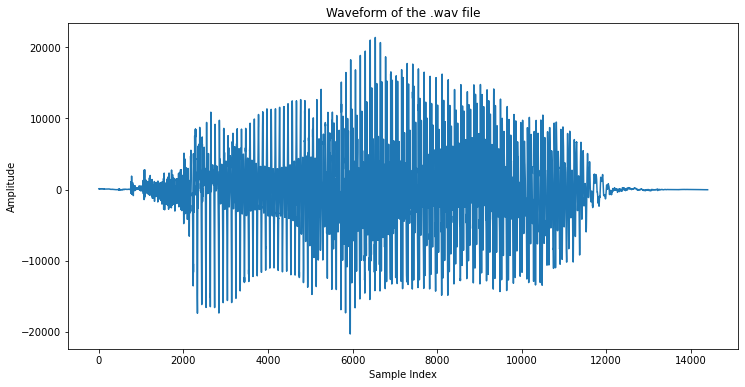

Sample Rate: 24000
Tensor Shape: torch.Size([14400])
Tensor Data Type: torch.int16


In [42]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
## averages stereo to make mono
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import Dataset, DataLoader

# Load the .wav file
sample_rate, data = wavfile.read('hello.wav')

# Convert the numpy array to a torch tensor
tensor_data = torch.from_numpy(data)

# Plot the waveform
plt.figure(figsize=(12, 6))
plt.plot(data)
plt.title('Waveform of the .wav file')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()

# Print some information about the tensor
print(f'Sample Rate: {sample_rate}')
print(f'Tensor Shape: {tensor_data.shape}')
print(f'Tensor Data Type: {tensor_data.dtype}')


In [303]:

from torch.utils.data import Dataset, DataLoader
class WaveformDataset(Dataset):
    def __init__(self, wav_data):
        self.wav_data = wav_data
        self.time_steps = np.arange(wav_data.shape[0])
        self.length = len(wav_data)

    def __len__(self):
        return self.length

    def __getitem__(self, idx):
        return self.wav_data[idx], self.time_steps[idx]

class RandomBatchSampler(torch.utils.data.Sampler):
    def __init__(self, data_source, batch_size):
        self.data_source = data_source
        self.batch_size = batch_size

    def __iter__(self):
        indices = torch.randperm(len(self.data_source)).tolist()
        for i in range(0, len(indices), self.batch_size):
            yield indices[i:i + self.batch_size]

    def __len__(self):
        return len(self.data_source) // self.batch_size
    
class PhaseAgreementLoss(nn.Module):
    def __init__(self):
        super(PhaseAgreementLoss, self).__init__()
    
    def forward(self, input, target):
        product = input * target
        loss = torch.sum(1- torch.sigmoid(product +4))
        return loss
    

In [324]:
# Define a loss function and optimizer
hyperparameters = {'learning_rate': 0.001
                   , 'epochs': 1000
                   ,'batch_size': 20}

In [325]:
####define network\
#print(sample_rate)
L = 4
network = DoubleDutchNetwork5(L, 44100)
#input_activation = torch.ones(hyperparameters['batch_size'], 1)

In [326]:


# Create the dataloader with the custom random batch sampler
dataset = WaveformDataset(data)
batch_size = hyperparameters['batch_size']
sampler = RandomBatchSampler(dataset, batch_size)
dataloader = DataLoader(dataset, batch_sampler=sampler)

In [327]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

# Define the loss function and optimizer
loss_function =  PhaseAgreementLoss() 
mse_loss = nn.MSELoss() 
optimizer = optim.Adam(network.parameters(), lr=hyperparameters['learning_rate'])

######gradients to store:
store_grad = False
if store_grad:
    gradients = {}


# Training loop
for epoch in range(hyperparameters['epochs']):
    network.train()  # Set the network to training mode
    epoch_loss = 0.0

    for batch in dataloader:
        targets, inputs = batch
        #print(inputs,targets)
        #break
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        #outputs = network(inputs)
        inputs = inputs.unsqueeze(1).float()
        input_activation = torch.ones_like(inputs).float()
        outputs = network(inputs,input_activation)

        # Compute the loss
        loss = loss_function(outputs, targets.unsqueeze(1).float())
        mse = mse_loss(outputs, targets.unsqueeze(1).float())
        loss =  loss   ##up mse.  hyper param, or maybe this moves? idk.  i bet this will be a bitch to train.
        #print(loss.dtype,outputs.dtype, targets.dtype)
        # Backward pass and optimize
        loss.backward()
        
        optimizer.step()
        
        #store gradients if you wanna
        if store_grad:
            for layer_name, layer in network.layers.named_children():
                if layer_name not in gradients:
                    gradients[layer_name] = {'a1': [], 'a2': [], 'c1': [], 'c2': []}

                gradients[layer_name]['a1'].append(layer.a1.detach().cpu().numpy().flatten())
                gradients[layer_name]['a2'].append(layer.a2.detach().cpu().numpy().flatten())
                gradients[layer_name]['c1'].append(layer.c1.detach().cpu().numpy().flatten())
                gradients[layer_name]['c2'].append(layer.c2.detach().cpu().numpy().flatten())

        epoch_loss += loss.item()

        #print(network.layers[0].c1.grad, network.layers[3].c1.grad)
        # Accumulate the loss for this batch
        epoch_loss += loss.item()

    # Calculate and print the average loss for this epoch
    avg_epoch_loss = epoch_loss / len(dataloader)
    if epoch% 100 ==0:
        print(f'Epoch [{epoch}/{hyperparameters["epochs"]}], Loss: {avg_epoch_loss:.4f}')

print("Training completed.")


Epoch [0/1000], Loss: 0.7220
Epoch [100/1000], Loss: 0.7192
Epoch [200/1000], Loss: 0.7190
Epoch [300/1000], Loss: 0.7189
Epoch [400/1000], Loss: 0.7188
Epoch [500/1000], Loss: 0.7186
Epoch [600/1000], Loss: 0.7185
Epoch [700/1000], Loss: 0.7184
Epoch [800/1000], Loss: 0.7183
Epoch [900/1000], Loss: 0.7183
Training completed.


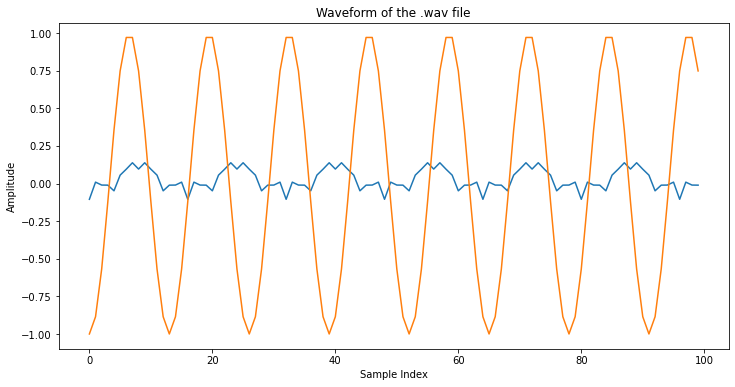

In [328]:
t = np.arange(data.shape[0])
network.eval()

def run_inference_in_batches(network, input_list, batch_size=100):
    # Convert the input list to a PyTorch tensor
    input_tensor = torch.tensor(input_list, dtype=torch.float32)
    
    # List to collect the outputs
    outputs = []
    
    # Process the input tensor in batches
    for start in range(0, len(input_tensor), batch_size):
        end = min(start + batch_size, len(input_tensor))
        batch = input_tensor[start:end]
        
        # Pass the batch through the network
        with torch.no_grad():  # No need to compute gradients during inference
            batch_output = network(batch.unsqueeze(1),torch.ones_like(batch).unsqueeze(1))
        
        # Append the batch output to the outputs list
        outputs.append(batch_output)
    
    # Concatenate all batch outputs into a single tensor
    final_output = torch.cat(outputs, dim=0)
    
    return final_output

o = run_inference_in_batches(network, t)

plt.figure(figsize=(12, 6))
plt.plot(o)
plt.plot(data)
plt.title('Waveform of the .wav file')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()

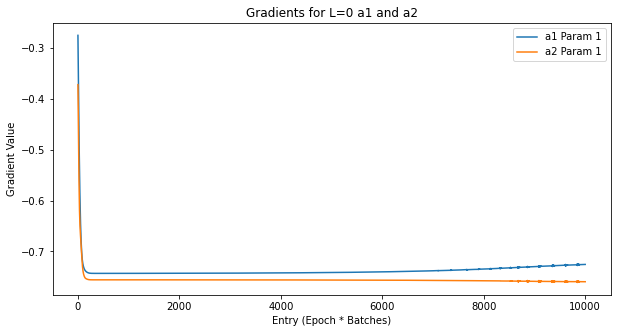

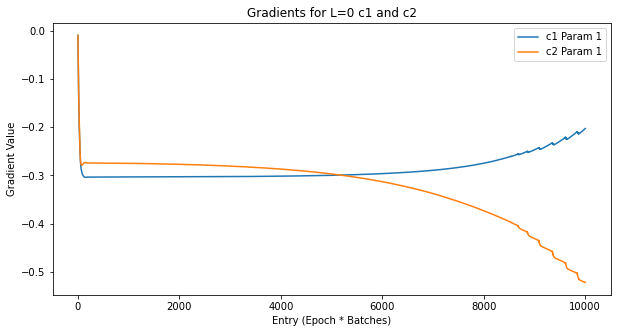

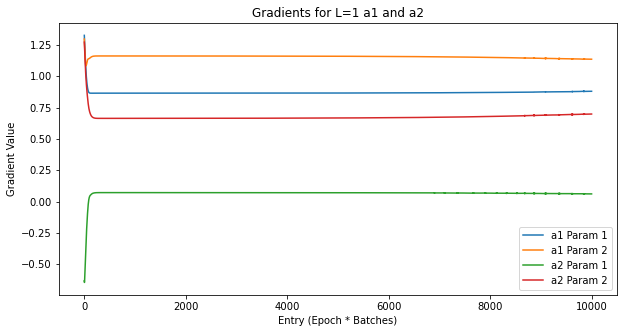

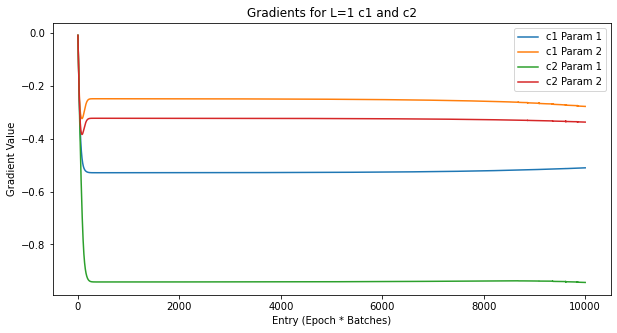

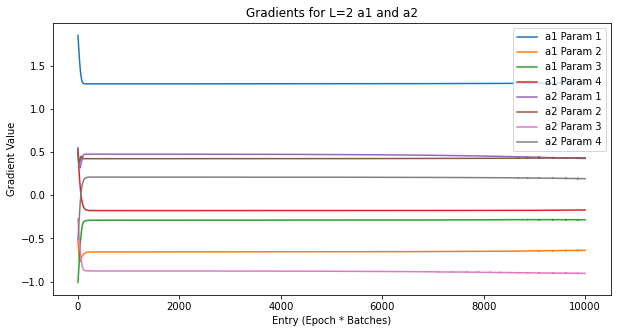

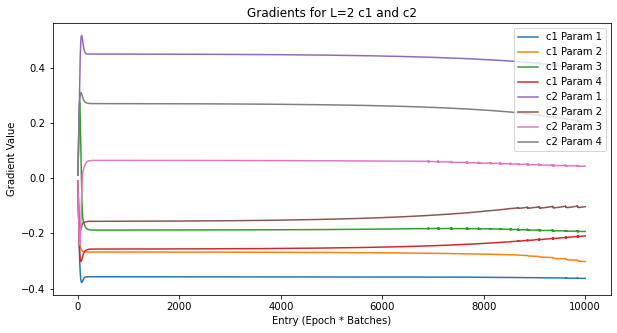

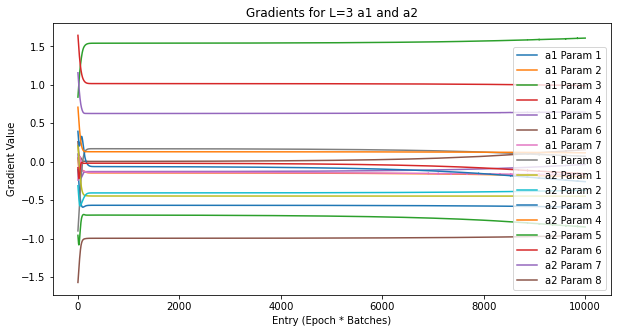

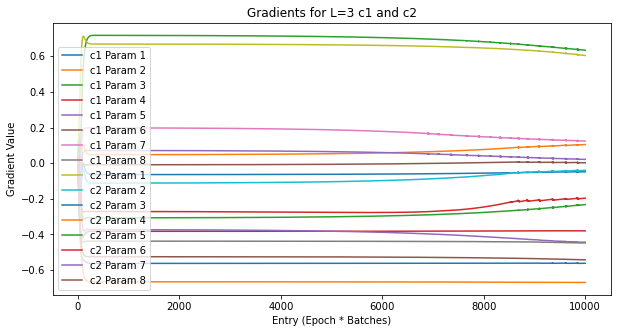

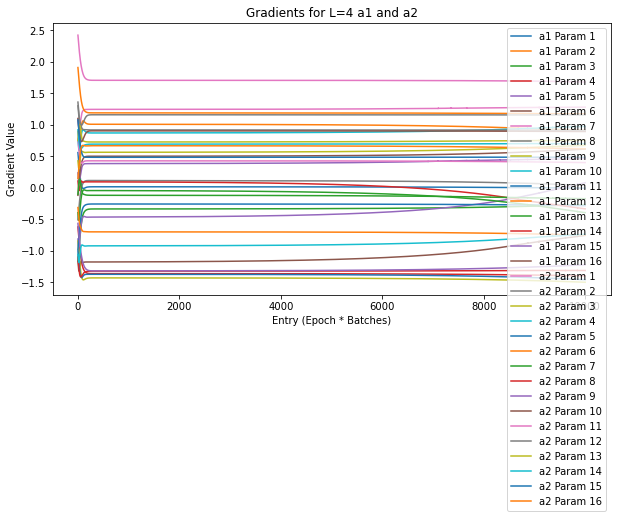

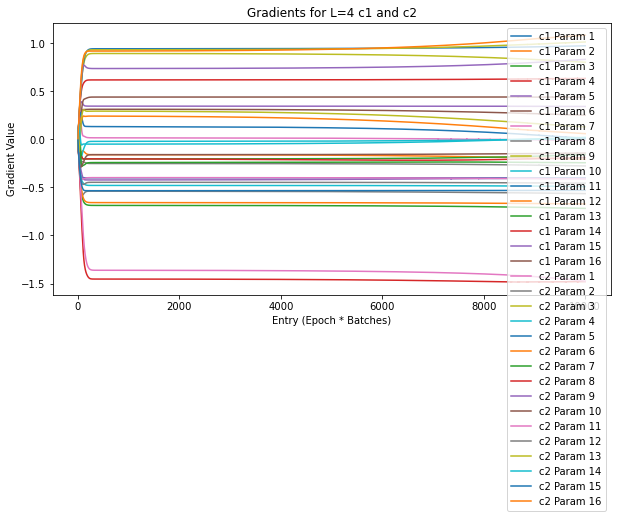

In [69]:
# Function to plot gradients for a1 and a2, c1 and c2 parameters in a layer
def plot_gradients_per_layer(layer_gradients, layer_name):
    # Plot a1 and a2 in the same graph
    plt.figure(figsize=(10, 5))
    for param_name in ['a1', 'a2']:
        param_gradients = np.array(layer_gradients[param_name])
        num_params = param_gradients.shape[1]

        for i in range(num_params):
            plt.plot(param_gradients[:, i], label=f'{param_name} Param {i+1}')
    
    plt.title(f'Gradients for L={layer_name} a1 and a2')
    plt.xlabel('Entry (Epoch * Batches)')
    plt.ylabel('Gradient Value')
    plt.legend()
    plt.show()

    # Plot c1 and c2 in the same graph
    plt.figure(figsize=(10, 5))
    for param_name in ['c1', 'c2']:
        param_gradients = np.array(layer_gradients[param_name])
        num_params = param_gradients.shape[1]

        for i in range(num_params):
            plt.plot(param_gradients[:, i], label=f'{param_name} Param {i+1}')
    
    plt.title(f'Gradients for L={layer_name} c1 and c2')
    plt.xlabel('Entry (Epoch * Batches)')
    plt.ylabel('Gradient Value')
    plt.legend()
    plt.show()

# Plot the gradients for each layer and parameter
for layer_name, layer_gradients in gradients.items():
    plot_gradients_per_layer(layer_gradients, layer_name)


In [ ]:
#where to put the activation? what if we just sum at the end of the waves. only sum the final wave amplitude? just get activations from the prior ones?